# EMNIST Dataset Classification Part 2: Neural Networks

Alright, time to move on to (in my opinion), the fun stuff: artificial neural network techniques. We'll go over both a standard, 2 layer densely connected neural network, and then do a couple of examples of CNNs.


In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, LeakyReLU, MaxPooling2D
from keras.layers import InputLayer
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from scipy.io import loadmat

full = loadmat('EMNIST_Data/emnist-byclass.mat')
data = full['dataset']
del full
arrs = data[0][0][0][0][0][0]
labels = data[0][0][0][0][0][1]

### Multi-layer Perceptron Architecture

Here we will be using densely connected layers with 2 hidden layers with ReLU activations. This treats the inputs in very much the same way as we would with standard classification techniques; that is that our inputs will be 784x1 features passed directly into the network.

In [28]:
train_X, test_X, train_y, test_y = train_test_split(arrs,labels, test_size=.33)

In [5]:
#normalizing, i.e., forcing on (0,1)

train_norm = train_X.astype('float32')
test_norm = test_X.astype('float32')
# normalize to range [0-1]
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [6]:
train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)

In [5]:
batch_size = 64
epochs = 10
num_classes = 62

In [8]:
dense_model = Sequential()
dense_model.add(InputLayer(input_shape=784,))
dense_model.add(Dense(256, activation='relu'))
dense_model.add(Dense(128, activation='relu'))
dense_model.add(Dense(62, activation='softmax'))


In [9]:
dense_model.compile(loss=keras.losses.categorical_crossentropy, 
                   optimizer=keras.optimizers.Adam(),
                   metrics=['accuracy'])


dense_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 62)                7998      
Total params: 241,854
Trainable params: 241,854
Non-trainable params: 0
_________________________________________________________________


In [10]:
dense_hist = dense_model.fit(train_norm, train_y, batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/10
7307/7307 [==============================] - 37s 3ms/step - loss: 0.9145 - accuracy: 0.7318
Epoch 2/10
7307/7307 [==============================] - 25s 3ms/step - loss: 0.4981 - accuracy: 0.8276
Epoch 3/10
7307/7307 [==============================] - 31s 4ms/step - loss: 0.4529 - accuracy: 0.8393
Epoch 4/10
7307/7307 [==============================] - 28s 4ms/step - loss: 0.4298 - accuracy: 0.8451
Epoch 5/10
7307/7307 [==============================] - 24s 3ms/step - loss: 0.4155 - accuracy: 0.8479
Epoch 6/10
7307/7307 [==============================] - 31s 4ms/step - loss: 0.4023 - accuracy: 0.8532
Epoch 7/10
7307/7307 [==============================] - 30s 4ms/step - loss: 0.3953 - accuracy: 0.8540
Epoch 8/10
7307/7307 [==============================] - 35s 5ms/step - loss: 0.3854 - accuracy: 0.8565
Epoch 9/10
7307/7307 [==============================] - 34s 5ms/step - loss: 0.3799 - accuracy: 0.8582
Epoch 10/10
7307/7307 [==============================] - 24s 3ms/step - l

In [11]:
dense_model.evaluate(test_norm,test_y)

7198/7198 [==============================] - 15s 2ms/step - loss: 0.4703 - accuracy: 0.8419


[0.4702737331390381, 0.8419315814971924]

In [12]:
dense_hist.history

{'loss': [0.6729996800422668,
  0.4906005561351776,
  0.45422446727752686,
  0.43468278646469116,
  0.42019858956336975,
  0.4094458520412445,
  0.40182241797447205,
  0.39405667781829834,
  0.3877074420452118,
  0.38273441791534424],
 'accuracy': [0.7857100367546082,
  0.8296971321105957,
  0.8391429781913757,
  0.8440743684768677,
  0.8476927280426025,
  0.8506439328193665,
  0.8521429896354675,
  0.8545659184455872,
  0.8559987545013428,
  0.8581351041793823]}

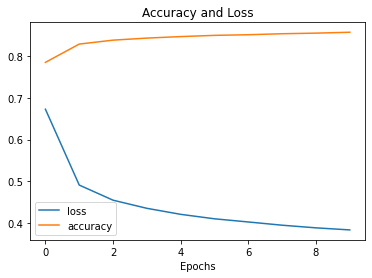

In [29]:
loss = dense_hist.history['loss']
accuracy = dense_hist.history['accuracy']

plt.plot(range(len(loss)),loss,label = 'loss')
plt.plot(range(len(loss)),accuracy, label = 'accuracy')
plt.title("Accuracy and Loss")
plt.xlabel("Epochs")
plt.legend();

### Convolutional Neural Networks:
In case you've never encountered the concept before, CNNs are a particular type of artificial neural network that employ a particular matrix operation (convolutions) as a part of their network architecture. As it turns out, this particular operation is very useful when it comes to employing neural networks to handle images, as we're doing here. I'll play around a bit with a couple of different network architectures, trying to employ a variety of layer types to see if we can see a noticeable difference in network accuracy.

### A simple CNN:

In [3]:
arrs = arrs.reshape((arrs.shape[0],28,28,1))
X=np.empty((len(arrs),28,28))
for i in range(len(arrs)):
    X[i]= arrs[i].T
    #for whatever reason, EMNIST comes in a transposed state out-of-the-box. This is not necessary for training
    #a CNN, but it does make me feel better, I suppose.

train_X, test_X, train_y, test_y = train_test_split(X,labels, test_size=.33)

#reshaping to image shapes
train_X_CNN = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_X_CNN = test_X.reshape((test_X.shape[0], 28, 28, 1))

train_norm_CNN = train_X.astype('float32')
test_norm_CNN = test_X.astype('float32')
# normalize to range [0-1]
train_norm_CNN = train_norm_CNN / 255.0
test_norm_CNN = test_norm_CNN / 255.0

In [5]:
train_norm_CNN.shape

(467614, 28, 28)

In [6]:
train_norm_CNN = train_norm_CNN.reshape((train_norm_CNN.shape[0], 28, 28, 1)) #CNN expects 3-dimensional inputs
test_norm_CNN = test_norm_CNN.reshape((test_norm_CNN.shape[0], 28, 28, 1))

In [31]:
train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)

In [12]:
batch_size = 64
epochs = 10
num_classes = 62

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)        

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
#using adam optimizer
tf.config.run_functions_eagerly(True)

In [ ]:
leaky_hist = model.fit(train_norm_CNN, train_y, batch_size=batch_size,epochs=epochs,verbose=1)

In [12]:
model.evaluate(test_norm,test_y)

7198/7198 [==============================] - 219s 30ms/step - loss: 0.4036 - accuracy: 0.8640


[0.40358564257621765, 0.8640097379684448]

In [14]:
##to-do; plot loss & accuracy
leaky_hist.history

{'loss': [0.4820551574230194,
  0.37227973341941833,
  0.3475993573665619,
  0.3309286832809448,
  0.31792882084846497,
  0.30614379048347473,
  0.29603472352027893,
  0.28671345114707947,
  0.2774590849876404,
  0.26996123790740967],
 'accuracy': [0.8337774276733398,
  0.8623608350753784,
  0.8691228032112122,
  0.8739451766014099,
  0.8776170015335083,
  0.8811733722686768,
  0.8844345808029175,
  0.8870350122451782,
  0.8897916078567505,
  0.8920519948005676]}

In [13]:
model.save('models')

INFO:tensorflow:Assets written to: models/assets


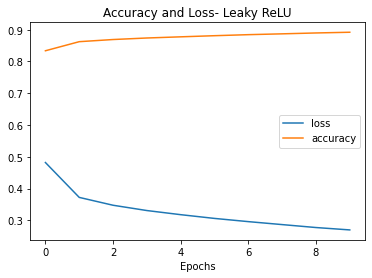

In [7]:
loss = leaky_hist.history['loss']
accuracy = leaky_hist.history['accuracy']

plt.plot(range(len(loss)),loss,label = 'loss')
plt.plot(range(len(loss)),accuracy, label = 'accuracy')
plt.title("Accuracy and Loss- Leaky ReLU")
plt.xlabel("Epochs")
plt.legend();

# Make this the first one? CNN ->A couple of fully connected layers. Pretty simple

In [32]:
arrs = arrs.reshape((arrs.shape[0],28,28,1))
X=np.empty((len(arrs),28,28))
for i in range(len(arrs)):
    X[i]= arrs[i].T

train_X, test_X, train_y, test_y = train_test_split(X,labels, test_size=.33)

#reshaping to image shapes
train_X_CNN = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_X_CNN = test_X.reshape((test_X.shape[0], 28, 28, 1))

train_norm_CNN = train_X.astype('float32')
test_norm_CNN = test_X.astype('float32')
# normalize to range [0-1]
train_norm_CNN = train_norm_CNN / 255.0
test_norm_CNN = test_norm_CNN / 255.0

In [ ]:
train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)

In [19]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(62,activation='softmax')
])

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
tf.config.run_functions_eagerly(True)
#helps handle some error I don't quite understand

In [35]:
cnn_hist = model.fit(train_norm_CNN,train_y,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/10
7307/7307 [==============================] - 474s 65ms/step - loss: 0.5693 - accuracy: 0.8113
Epoch 2/10
7307/7307 [==============================] - 477s 65ms/step - loss: 0.4212 - accuracy: 0.8487
Epoch 3/10
7307/7307 [==============================] - 518s 71ms/step - loss: 0.3854 - accuracy: 0.8578
Epoch 4/10
7307/7307 [==============================] - 473s 65ms/step - loss: 0.3602 - accuracy: 0.8648
Epoch 5/10
7307/7307 [==============================] - 435s 60ms/step - loss: 0.3407 - accuracy: 0.8700
Epoch 6/10
7307/7307 [==============================] - 494s 68ms/step - loss: 0.3253 - accuracy: 0.8747
Epoch 7/10
7307/7307 [==============================] - 441s 60ms/step - loss: 0.3115 - accuracy: 0.8784
Epoch 8/10
7307/7307 [==============================] - 434s 59ms/step - loss: 0.2996 - accuracy: 0.8827
Epoch 9/10
7307/7307 [==============================] - 430s 59ms/step - loss: 0.2899 - accuracy: 0.8860
Epoch 10/10
7307/7307 [==============================] 

In [36]:
model.evaluate(test_norm_CNN,test_y)

7198/7198 [==============================] - 113s 16ms/step - loss: 0.5279 - accuracy: 0.8459


[0.5278806686401367, 0.8458826541900635]

In [37]:
cnn_hist.history

{'loss': [0.569303572177887,
  0.4212033152580261,
  0.3853912949562073,
  0.36016303300857544,
  0.34074538946151733,
  0.3252966105937958,
  0.3115089237689972,
  0.2995729148387909,
  0.28991955518722534,
  0.2796272933483124],
 'accuracy': [0.8113272786140442,
  0.8487064242362976,
  0.857814371585846,
  0.8648329377174377,
  0.8699867725372314,
  0.8746722936630249,
  0.8783911466598511,
  0.8827323317527771,
  0.886019229888916,
  0.8899455666542053]}

In [38]:
model.save('models/othercnn')

INFO:tensorflow:Assets written to: models/othercnn/assets


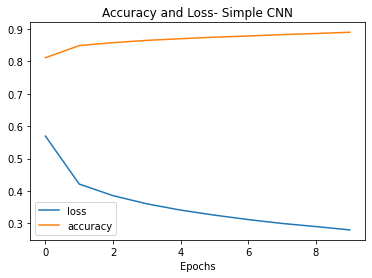

In [9]:
loss = cnn_hist.history['loss']
accuracy = cnn_hist.history['accuracy']

plt.plot(range(len(loss)),loss,label = 'loss')
plt.plot(range(len(loss)),accuracy, label = 'accuracy')
plt.title("Accuracy and Loss- Simple CNN")
plt.xlabel("Epochs")
plt.legend();

# Last one. In this case, we're using dropout layers in order to prevent overfitting.

In [8]:
from keras.layers import BatchNormalization, Dropout


In [3]:
train_X, test_X, train_y, test_y = train_test_split(arrs,labels, test_size=.33)

In [4]:
#normalizing, i.e., forcing on (0,1)

train_norm = train_X.astype('float32')
test_norm = test_X.astype('float32')
# normalize to range [0-1]
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [5]:
train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)

In [6]:
batch_size = 64
epochs = 10
num_classes = 62

In [11]:
model = Sequential()
model.add(tf.keras.layers.Reshape((28, 28, 1), input_shape=(784,)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization()) 
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=62, activation='softmax'))
model.compile(
optimizer='adam',loss='categorical_crossentropy',metrics=tf.keras.metrics.CategoricalAccuracy())

In [12]:
dropout_hist=model.fit(train_norm, train_y, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
7307/7307 [==============================] - 1082s 144ms/step - loss: 0.9081 - categorical_accuracy: 0.6497
Epoch 2/10
7307/7307 [==============================] - 989s 135ms/step - loss: 0.4974 - categorical_accuracy: 0.7988
Epoch 3/10
7307/7307 [==============================] - 999s 137ms/step - loss: 0.4576 - categorical_accuracy: 0.8154
Epoch 4/10
7307/7307 [==============================] - 1093s 150ms/step - loss: 0.4354 - categorical_accuracy: 0.8243
Epoch 5/10
7307/7307 [==============================] - 1046s 143ms/step - loss: 0.4195 - categorical_accuracy: 0.8301
Epoch 6/10
7307/7307 [==============================] - 1025s 140ms/step - loss: 0.4067 - categorical_accuracy: 0.8343
Epoch 7/10
7307/7307 [==============================] - 1102s 151ms/step - loss: 0.3985 - categorical_accuracy: 0.8375
Epoch 8/10
7307/7307 [==============================] - 1112s 152ms/step - loss: 0.3919 - categorical_accuracy: 0.8401
Epoch 9/10
7307/7307 [============================

In [13]:
model.evaluate(test_norm,test_y)

7198/7198 [==============================] - 138s 19ms/step - loss: 0.3682 - categorical_accuracy: 0.8455


[0.36818569898605347, 0.845549464225769]

In [20]:
dropout_hist.history

{'loss': [0.6522341966629028,
  0.4887202978134155,
  0.45505964756011963,
  0.4333209693431854,
  0.417665034532547,
  0.40790557861328125,
  0.3999238610267639,
  0.39537733793258667,
  0.39229488372802734,
  0.388421893119812],
 'categorical_accuracy': [0.7344292402267456,
  0.8041039109230042,
  0.818015992641449,
  0.8259417414665222,
  0.8312522768974304,
  0.8351530432701111,
  0.8381898403167725,
  0.8406895399093628,
  0.8426643013954163,
  0.8442976474761963]}

In [15]:
model.save('models/oneMorecnn')

INFO:tensorflow:Assets written to: models/oneMorecnn/assets


INFO:tensorflow:Assets written to: models/oneMorecnn/assets


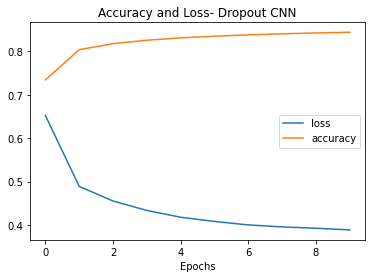

In [10]:
loss = dropout_hist.history['loss']
accuracy = dropout_hist_hist.history['accuracy']

plt.plot(range(len(loss)),loss,label = 'loss')
plt.plot(range(len(loss)),accuracy, label = 'accuracy')
plt.title("Accuracy and Loss- Dropout CNN")
plt.xlabel("Epochs")
plt.legend();